In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("hotel_bookings.csv")

In [ ]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.shape

(119390, 36)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [4]:
df.describe(include='object').T

,count,unique,top,freq
hotel,51390,2,Resort Hotel,40060
arrival_date_month,51390,12,August,6472
meal,51390,5,BB,38799
country,50912,136,PRT,23542
market_segment,51390,8,Online TA,22218
distribution_channel,51390,5,TA/TO,39328
reserved_room_type,51390,10,A,33301
assigned_room_type,51390,12,A,25661
deposit_type,51390,3,No Deposit,47375
customer_type,51390,4,Transient,36556


In [5]:
for i in df.describe(include='object').columns:
   print(i)
   print(df[i].unique())
   print("-"*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df.drop(['company','agent'],axis=1,inplace=True)
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000,50907.000000
mean,0.336241,90.794036,2015.971733,27.231618,15.800145,1.112067,2.933781,1.862043,0.116055,0.011983,0.034848,0.079262,0.101165,0.260691,2.602235,94.307529,0.109396,0.554639
std,0.472427,93.645307,0.736303,13.911146,8.799431,1.107984,2.304015,0.651454,0.425819,0.117990,0.183396,1.184765,0.826108,0.696475,17.440492,61.036165,0.317380,0.787065
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,13.000000,2015.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.500000,0.000000,0.000000
50%,0.000000,61.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.500000,0.000000,0.000000
75%,1.000000,142.000000,2017.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,30.000000,20.000000,259.000000,5400.000000,8.000000,5.000000


In [9]:
df=df[df['adr']<5000]

Data Analysis and Visulization

In [10]:
df['is_canceled']=df['is_canceled'].astype('int')

In [11]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

0    0.663772
1    0.336228
Name: is_canceled, dtype: float64


In [12]:
type(df['is_canceled'])

pandas.core.series.Series

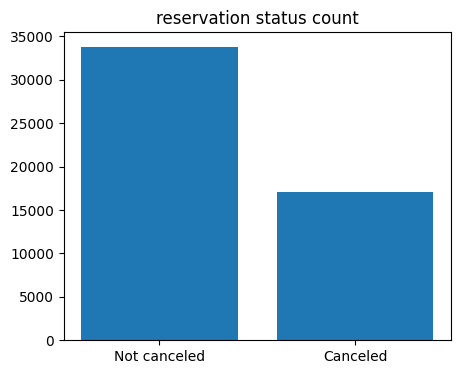

In [13]:
plt.figure(figsize=(5,4))
plt.title('reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),width=0.8)
plt.show()

OBSERVATION-The accompanying bar graph shows the percentage of reservaion that are canceled and those that are not.It is obvious that there are still a significant number of reservations that have not been canceled.There are still 37% of clients who canceled their reservation,which has a significant impact on the hotels earnings.

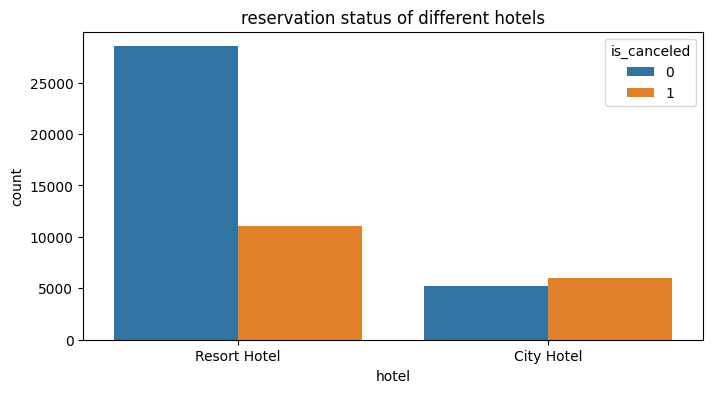

In [14]:
plt.figure(figsize=(8,4))
plt.title("reservation status of different hotels")
plt.xlabel("hotel")
plt.ylabel("number of reservations")
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df)


OBSERVATION- In comparison to resort hotels,city hotels have more booking .It's possible that resort hotels are more expensive than those in cities.

In [17]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [18]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

1    0.533952
0    0.466048
Name: is_canceled, dtype: float64

In [19]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()

In [20]:
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

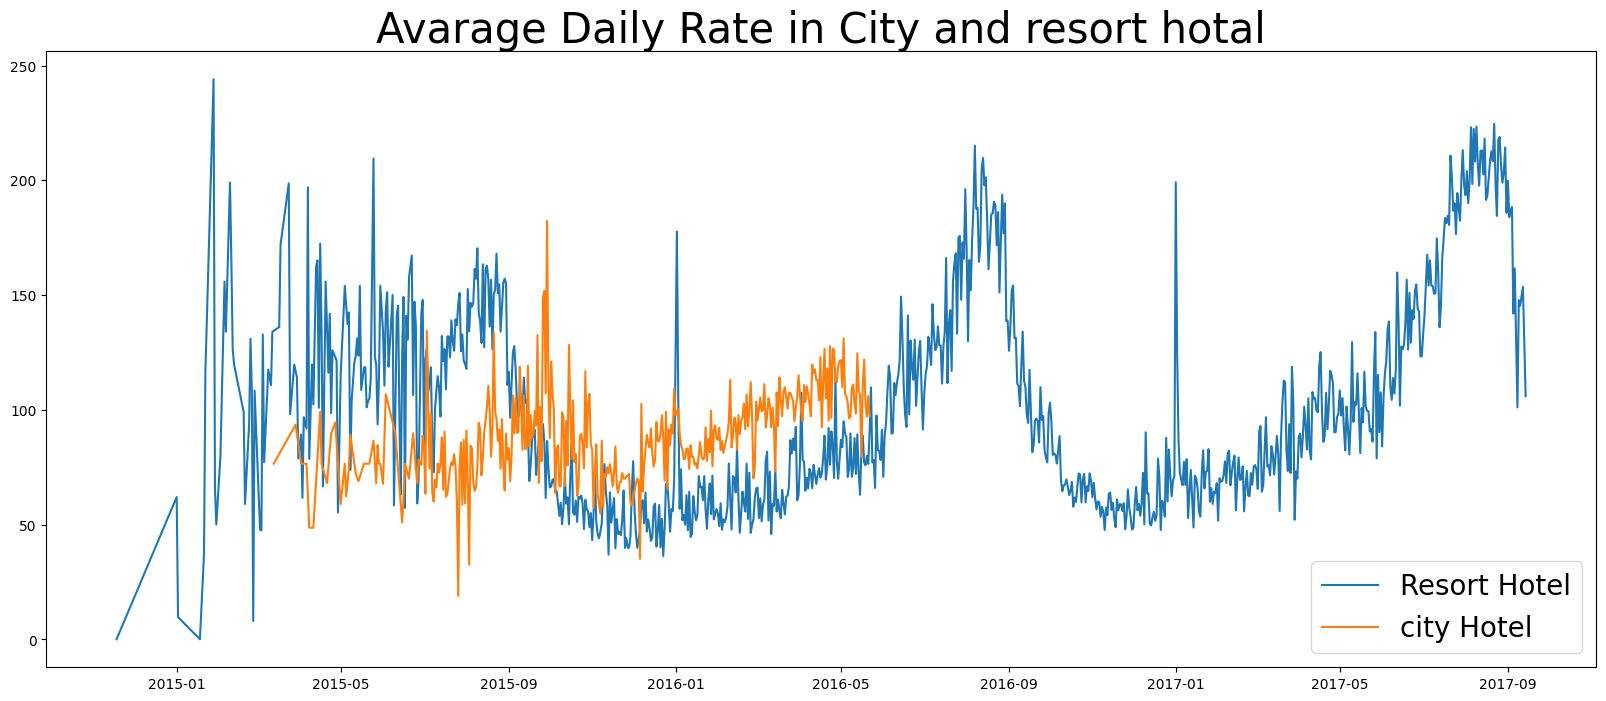

In [21]:
plt.figure(figsize=(20,8))
plt.title('Avarage Daily Rate in City and resort hotal',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'],label='city Hotel')
plt.legend(fontsize=20)
plt.show()


OBSERVATION-The line graph above shows that,on cerain days,the average daily rate for a city hotel is less than that of a resort hotel,and on other days,it is even less .It goes without saying that weekends and holidays may see a rise in resort hotel rates.

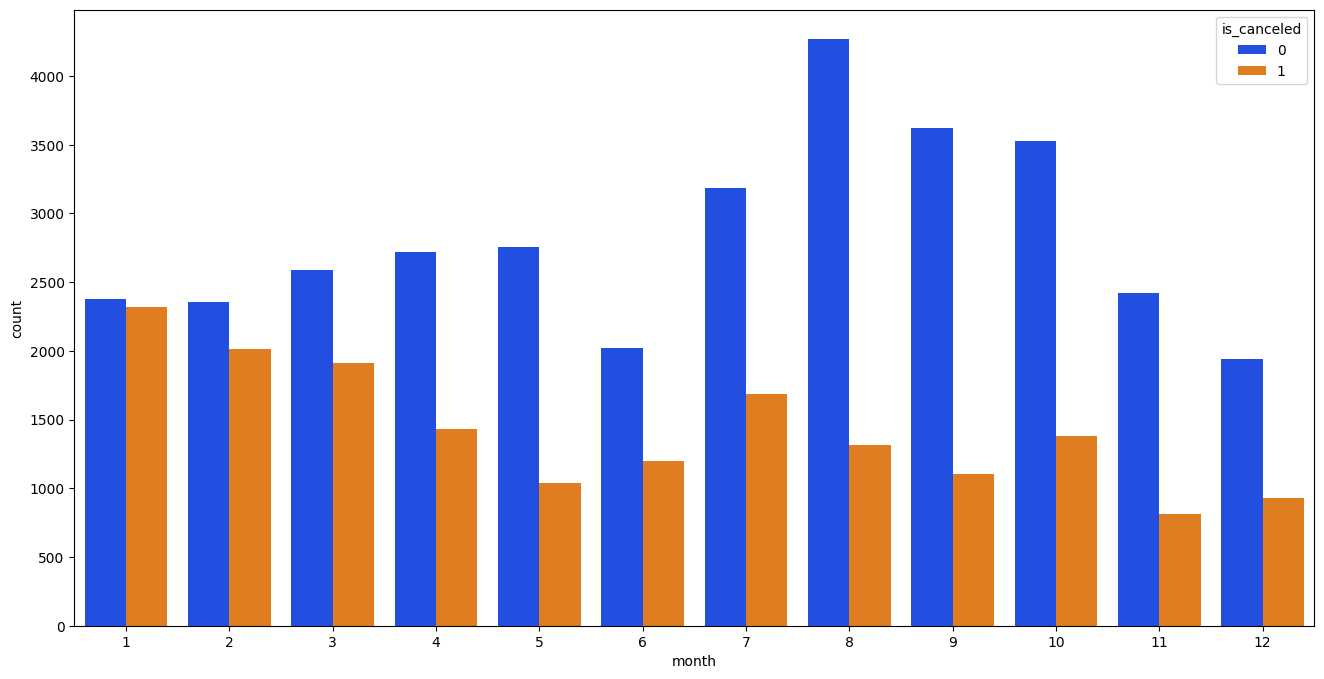

In [22]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df,palette='bright')
plt.show()

OBSERVATION-we have developed the grouped bar graph to analze the months with the highest and lowest reservation levels according to reservation status .As we can see,both the number of confirmed reservation and the number of canceled reservations are largest in the month of August,whereas January is the month with the most canceled reservations.

In [ ]:
data1 = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum()

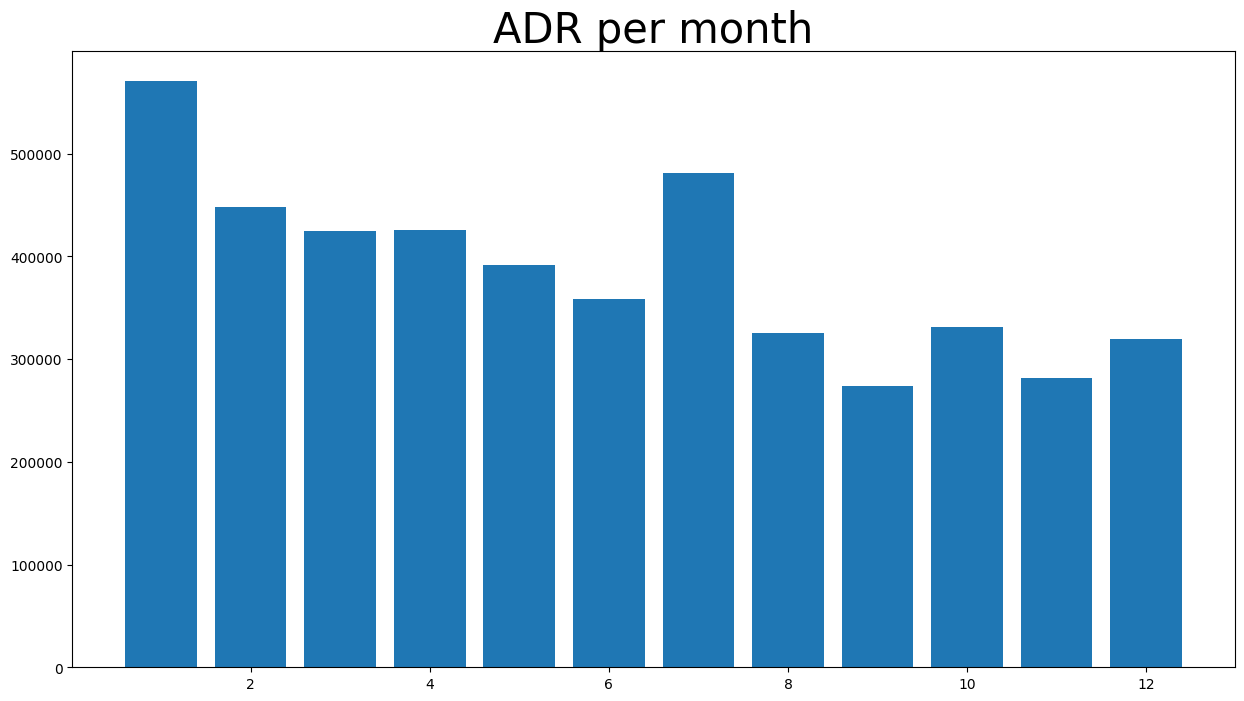

In [ ]:
#df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(15,8))
plt.title('ADR per month',fontsize=30)
plt.bar('month','adr',data =data1.reset_index())
plt.show()


OBSERVATION-This bar graph demonstrate that cancellations are most common when prices are highest and least common when they are lowest.Therefore ,the cost of the accommodation is solely responsible for the cancellation.

Now, let's see which country has the highest reserevation canceled.

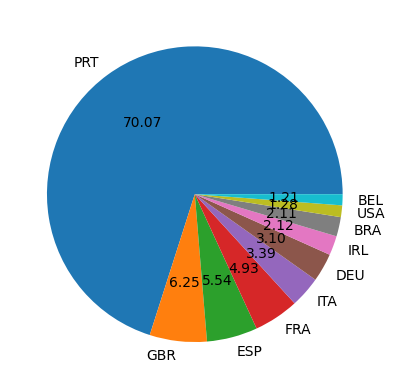

In [ ]:
cancelled_data=df[df['is_canceled']==1]
top_10_country=cancelled_data['country'].value_counts()[:10]
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()

OBSERVATION-The top country is Porugal with the highest number of cancellations.

In [ ]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [ ]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

Around 47% of the clients come from online travel agencies,whereas 16% come from groups.Only 10% of clients book hotels directly by visiting them and making reservations.

In [ ]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

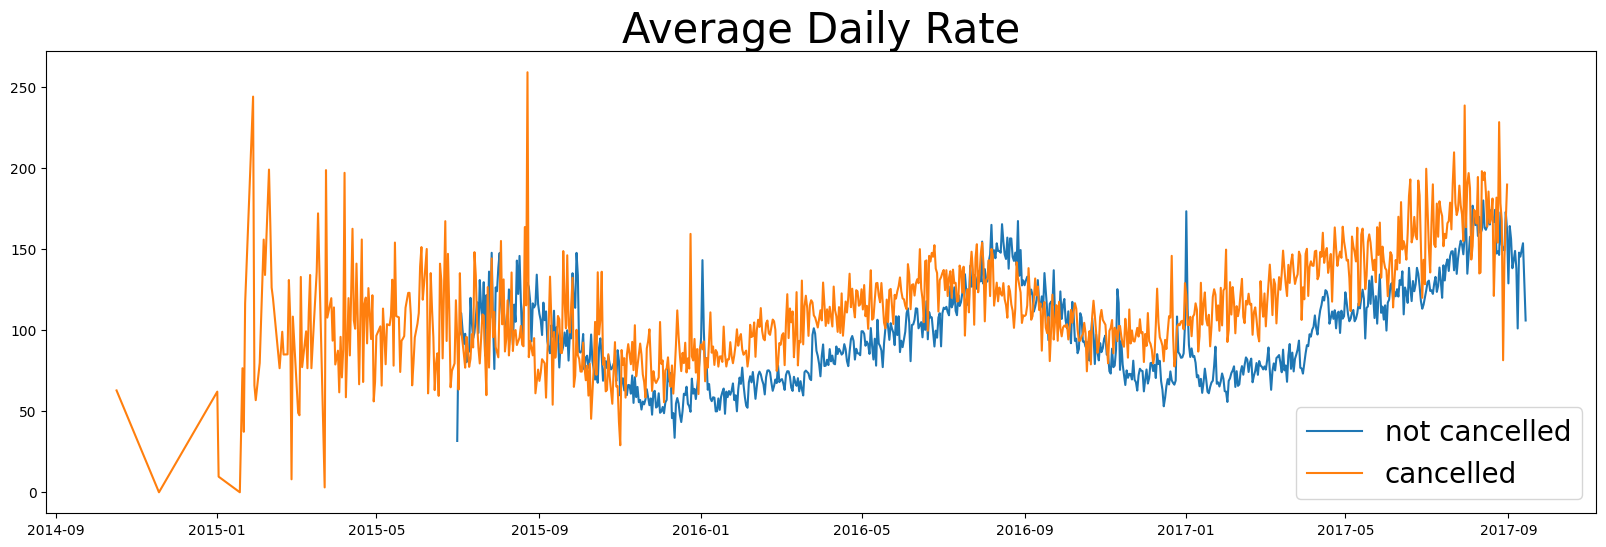

In [ ]:
cancelled_df_adr=cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_df_adr=not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate',fontsize=30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.legend(fontsize=20)

OBSERVATION-AS seen in the graph,reservation are canceled when the avarage dail rae is  higher then when it is not canceled.It clearly proves all the above analsis ,that the higher price leads to higher cancellaion.